In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [18]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df['is_exoplanet']=df['koi_disposition']=='CONFIRMED'
df.head()


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,is_exoplanet
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,True
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,True
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,False
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,False
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,True


# Create a Train Test Split

Use `koi_disposition` for the y values

In [19]:
X=df.drop('koi_disposition',axis=1).drop('is_exoplanet',axis=1)
y=df['is_exoplanet']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
8017,0,1,1,0,0.806277,4.947000e-06,-4.947000e-06,131.785670,0.006720,-0.006720,...,-184.0,4.471,0.054,-0.229,0.996,0.324,-0.108,290.81723,38.539120,13.614
1233,0,1,1,0,3.582077,4.318000e-06,-4.318000e-06,355.515064,0.000864,-0.000864,...,-235.0,4.422,0.090,-0.195,0.993,0.283,-0.131,296.07822,43.136940,15.193
2592,0,0,0,0,5.060923,2.616000e-05,-2.616000e-05,134.473160,0.004730,-0.004730,...,-112.0,4.492,0.048,-0.112,0.911,0.121,-0.060,289.91742,40.828606,13.346
4770,0,1,0,1,8.480304,3.320000e-07,-3.320000e-07,135.854534,0.000031,-0.000031,...,-169.0,3.946,0.195,-0.105,2.210,0.375,-0.563,298.80020,46.665539,7.631
6632,0,0,0,1,4.994716,4.495000e-05,-4.495000e-05,136.183300,0.009500,-0.009500,...,-194.0,3.706,0.320,-0.080,2.830,0.458,-1.068,282.58215,46.815510,13.352


# Pre-processing

Scale the data using the MinMaxScaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\PC\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Support Vector Machine

In [27]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression()
log_reg_classifier

log_reg_classifier.fit(X_train_scaled, y_train)

log_reg_classifier.predict(X_test_scaled)

print(f"Training Data Score: {log_reg_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {log_reg_classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8499542543458372
Testing Data Score: 0.8371454711802379


C:\Users\PC\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
#Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8485818847209515

In [29]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.9048490393412626

In [31]:
#K Nearest Neighnors

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    


k: 1, Train/Test Score: 1.000/0.793
k: 3, Train/Test Score: 0.900/0.804
k: 5, Train/Test Score: 0.874/0.817
k: 7, Train/Test Score: 0.867/0.817
k: 9, Train/Test Score: 0.861/0.815
k: 11, Train/Test Score: 0.856/0.810
k: 13, Train/Test Score: 0.853/0.807
k: 15, Train/Test Score: 0.852/0.814
k: 17, Train/Test Score: 0.848/0.811
k: 19, Train/Test Score: 0.844/0.812
k: 21, Train/Test Score: 0.844/0.811
k: 23, Train/Test Score: 0.843/0.810
k: 25, Train/Test Score: 0.843/0.812
k: 27, Train/Test Score: 0.841/0.816
k: 29, Train/Test Score: 0.841/0.812
k: 31, Train/Test Score: 0.842/0.812
k: 33, Train/Test Score: 0.840/0.806
k: 35, Train/Test Score: 0.840/0.807
k: 37, Train/Test Score: 0.841/0.805
k: 39, Train/Test Score: 0.839/0.805
k: 41, Train/Test Score: 0.837/0.806
k: 43, Train/Test Score: 0.837/0.807
k: 45, Train/Test Score: 0.836/0.806
k: 47, Train/Test Score: 0.835/0.805
k: 49, Train/Test Score: 0.834/0.805
k: 51, Train/Test Score: 0.835/0.806
k: 53, Train/Test Score: 0.836/0.806
k: 55,

<Figure size 640x480 with 1 Axes>

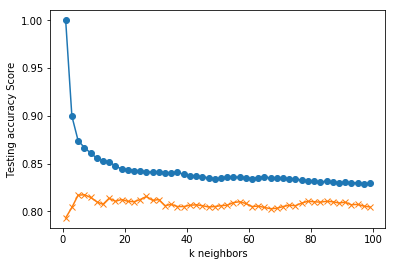

In [33]:
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [35]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train_scaled, y_train)
predicted_values = neigh.predict(X_test_scaled)
print(f"Training Data Score: {neigh.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {neigh.score(X_test_scaled, y_test)}")

Training Data Score: 0.8668801463860933
Testing Data Score: 0.8174748398902104


In [41]:
# Create a Support Vector Machine
from sklearn.svm import SVC 
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

svm_model.predict(X_test_scaled)

print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8546813052759987
Testing Data Score: 0.8408051235132662


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [42]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(svm_model, param_grid, verbose=3)

In [43]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

C:\Users\PC\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .... C=0.1, gamma=0.0001, score=0.8175582990397805, total=   1.0s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .... C=0.1, gamma=0.0001, score=0.8339432753888381, total=   1.1s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.0001, score=0.848512585812357, total=   1.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.8175582990397805, total=   1.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.8339432753888381, total=   1.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...... C=0.1, gamma=0.001, score=0.848512585812357, total=   1.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8175582990397805, total=   1.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8339432753888381, total=   1.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.848512585812357, total=   1.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ... C=1000, gamma=0.0001, score=0.8770004572473709, total=   2.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.8645928636779506, total=   3.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.9043478260869565, total=   3.1s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.8770004572473709, total=   2.7s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.8645928636779506, total=   3.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.9043478260869565, total=   3.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.8770004572473709, total=   2.7s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [45]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1000, 'gamma': 0.0001}
0.8819762122598354


In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(svm_model, param_grid, verbose=3)

In [60]:
#Compare
print(f"Logistic Regression Testing Data Score: {log_reg_classifier.score(X_test_scaled, y_test)}")
print(f"Decision Tree Testing Data Score: {clf.score(X_test_scaled, y_test)}")
print(f"Random Forest Testing Data Score: {rf.score(X_test_scaled, y_test)}")
print(f"K Neighbors Testing Data Score: {neigh.score(X_test_scaled, y_test)}")
print(f"Support Vector Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")
print(f"Tuned Support Vector Testing Data Score: {grid.best_score_}")


Logistic Regression Testing Data Score: 0.8371454711802379
Decision Tree Testing Data Score: 0.8485818847209515
Random Forest Testing Data Score: 0.9048490393412626
K Neighbors Testing Data Score: 0.8174748398902104
Support Vector Testing Data Score: 0.8408051235132662
Tuned Support Vector Testing Data Score: 0.8819762122598354
